In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-sample/Final.csv


# Understanding the situation
**This notebook is constructed to answer the question: "How member and casual ride Divvy bikes differently ?" and also provide relevant statistics to backup the findings** 

This dataset has been cleaned, transformed and sampled from GoogleBigQuery. In this notebook, i will do the following activities:
* Understand the data clearly by answering question like: what types is the data, what purpose does it serves,...
* Do univariate analysis, multivariable analysis, transform data in different ways, visuallization, find correlation, hypothesis testing,...etc
* Come up with recommendations from findings

# Understanding the data
**Let's import the data**

In [2]:
df = pd.read_csv("/kaggle/input/divvy-sample/Final.csv")
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,distance_in_kilometers,day_of_week,ride_length
0,CFEF9FFE6CC94F58,classic_bike,2024-03-11 19:36:14 UTC,2024-03-11 19:49:20 UTC,Larrabee St & Webster Ave,13193,Dearborn Pkwy & Delaware Pl,TA1307000128,41.921822,-87.644140,41.898969,-87.629912,member,3,2.800644,Monday,0-0 0 0:13:6
1,7A82C43569F230AA,classic_bike,2024-02-08 17:30:24 UTC,2024-02-08 17:33:27 UTC,Halsted St & Maxwell St,TA1309000001,Clinton St & Roosevelt Rd,WL-008,41.864883,-87.647071,41.867118,-87.641088,member,2,0.554269,Thursday,0-0 0 0:3:3
2,FD25CFAEA932E414,electric_bike,2024-03-01 14:13:48 UTC,2024-03-01 14:16:58 UTC,Chicago Ave & Sheridan Rd,E008,Sheridan Rd & Noyes St (NU),604,42.050537,-87.677861,42.058239,-87.677432,member,3,0.857145,Friday,0-0 0 0:3:10
3,7C1DBAB126AA7287,electric_bike,2024-03-18 18:56:42 UTC,2024-03-18 19:10:50 UTC,Ashland Ave & Division St,13061,Ritchie Ct & Banks St,KA1504000134,41.903426,-87.667953,41.906866,-87.626217,member,3,3.475099,Monday,0-0 0 0:14:8
4,338F408D5C0C7A9D,electric_bike,2024-03-21 14:43:50 UTC,2024-03-21 15:06:11 UTC,NaN,NaN,NaN,NaN,41.880000,-87.640000,41.940000,-87.650000,member,3,6.722829,Thursday,0-0 0 0:22:21
5,1BDB378EE02FFC3B,electric_bike,2024-01-25 12:20:03 UTC,2024-01-25 12:22:50 UTC,Sheridan Rd & Lawrence Ave,TA1309000041,Broadway & Wilson Ave,13074,41.969541,-87.654566,41.965221,-87.658139,member,1,0.563929,Thursday,0-0 0 0:2:47
6,963CF7C4BF407836,classic_bike,2024-03-28 19:37:07 UTC,2024-03-28 19:43:32 UTC,Mies van der Rohe Way & Chestnut St,15529,State St & Pearson St,TA1307000061,41.898587,-87.621915,41.897448,-87.628722,casual,3,0.577424,Thursday,0-0 0 0:6:25
7,C9CE83C903FB5902,classic_bike,2024-02-09 12:27:21 UTC,2024-02-09 12:27:32 UTC,900 W Harrison St,13028,900 W Harrison St,13028,41.874754,-87.649807,41.874754,-87.649807,member,2,0.000000,Friday,0-0 0 0:0:11
8,1CB42698A24F0481,classic_bike,2024-03-21 17:03:21 UTC,2024-03-21 17:15:17 UTC,Elston Ave & Cortland St,TA1305000039,Lincoln Ave & Fullerton Ave,TA1309000058,41.916433,-87.666746,41.924161,-87.646380,member,3,1.891476,Thursday,0-0 0 0:11:56
9,8785E9D2AF70E92F,electric_bike,2024-01-30 13:36:20 UTC,2024-01-30 13:38:12 UTC,Franklin St & Lake St,TA1307000111,Orleans St & Merchandise Mart Plaza,TA1305000022,41.885571,-87.635608,41.888243,-87.636390,member,1,0.304092,Tuesday,0-0 0 0:1:52


**Looking at the few first rows, i have a few observations:**
* Each rows seem to represent a time where customers uses a Divvy Bike
* Customer can choose from electric_bike or classic_bike
* Each rows also have location of start point and endpoint as well as the time
* Each rides have an unique id
* Each station have an unique id

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ride_id                 10000 non-null  object 
 1   rideable_type           10000 non-null  object 
 2   started_at              10000 non-null  object 
 3   ended_at                10000 non-null  object 
 4   start_station_name      8671 non-null   object 
 5   start_station_id        8671 non-null   object 
 6   end_station_name        8644 non-null   object 
 7   end_station_id          8644 non-null   object 
 8   start_lat               10000 non-null  float64
 9   start_lng               10000 non-null  float64
 10  end_lat                 10000 non-null  float64
 11  end_lng                 10000 non-null  float64
 12  member_casual           10000 non-null  object 
 13  month                   10000 non-null  int64  
 14  distance_in_kilometers  10000 non-null 

**Looking at the info table:**
* The name and id seem to have some null values that were missing. Since it would not affect the result in our question i will ignore it
* The dataset have 10 thousands observations as expected
* The type of each columns seems odd as started_at, ended_at and ride_length should be date_time so we will change it back

In [4]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])
df['ride_length']=df['ended_at']-df['started_at']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   ride_id                 10000 non-null  object             
 1   rideable_type           10000 non-null  object             
 2   started_at              10000 non-null  datetime64[ns, UTC]
 3   ended_at                10000 non-null  datetime64[ns, UTC]
 4   start_station_name      8671 non-null   object             
 5   start_station_id        8671 non-null   object             
 6   end_station_name        8644 non-null   object             
 7   end_station_id          8644 non-null   object             
 8   start_lat               10000 non-null  float64            
 9   start_lng               10000 non-null  float64            
 10  end_lat                 10000 non-null  float64            
 11  end_lng                 10000 non-null  fl

**As can be seen we have successfully change it back to datetime**

In [6]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,month,distance_in_kilometers,ride_length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
mean,41.899160,-87.647163,41.899972,-87.647253,2.260900,1.913704,0 days 00:13:25.416200
std,0.047199,0.027150,0.047447,0.027195,0.780315,1.785750,0 days 00:37:39.827961155
min,41.650000,-87.801187,41.648501,-87.840000,1.000000,0.000000,-1 days +23:59:59
25%,41.879338,-87.661364,41.879472,-87.660459,2.000000,0.819512,0 days 00:04:50
50%,41.895423,-87.644098,41.895765,-87.644098,2.000000,1.385495,0 days 00:08:11
75%,41.926690,-87.630000,41.929143,-87.630000,3.000000,2.416711,0 days 00:14:11
max,42.064854,-87.543115,42.064854,-87.533531,3.000000,18.168479,1 days 00:59:54


**From the description table:**
* Longitude and latitude seems to be distributed correctly in the area of 41 and -87 as we are in Chicago
* Month seems to be correct with January, Febuary, March
* Distance seems rather normal with mean of around 2 km but riding a bikes for 18 km is a bit extreme so we will have to look into that
* Ride_length is also peculiar as the maximum is one day and the minimum is minus one day which frankly makes no sense when riding a bike

# Investigate the variable
**As what we are doing is trying to answer the question differentiating between member and casual riders and try to classify types of user let's first focus on member_casual:**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

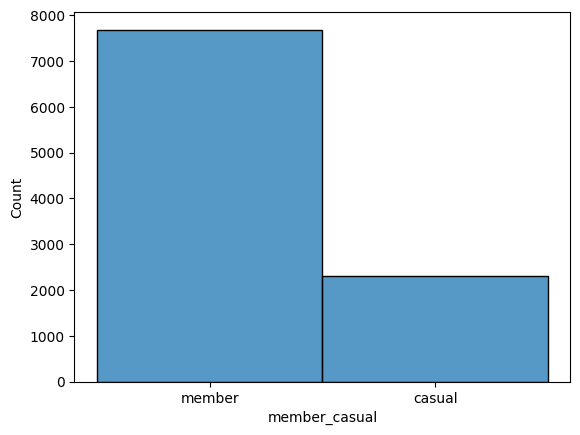

In [7]:
sns.histplot(x=df['member_casual'])

**As can be seen:**
* There are 2 types of riders: member and casual
* The number of riders is significantly higher than casual riders almost triple

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

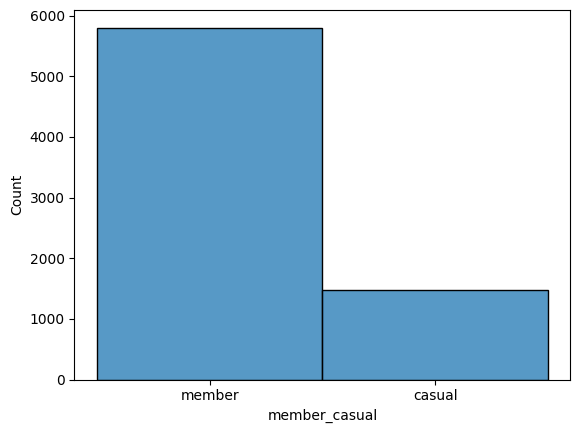

In [8]:
below_mean_rider = df[df['ride_length']<= np.mean(df['ride_length'])]
sns.histplot(x=below_mean_rider['member_casual'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

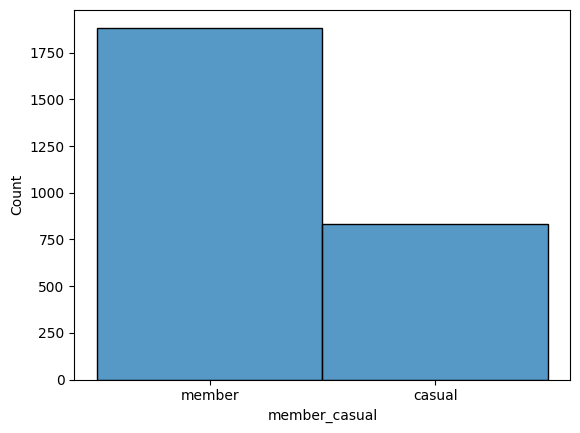

In [9]:
above_mean_rider = df[df['ride_length']> np.mean(df['ride_length'])]
sns.histplot(x=above_mean_rider['member_casual'])

In [10]:
ratioa = len(above_mean_rider[above_mean_rider['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean ride length:',ratioa*100,'%')

The percentage of casual rider riding above mean ride length: 35.91184096802074 %


In [11]:
ratiob = len(above_mean_rider[above_mean_rider['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean ride length:',ratiob*100,'%')

The percentage of member rider riding above mean ride length: 24.512099921935988 %


**From graphs and calculations, it is reasonable to conclude:**
* Casual riders likes to ride for longer length of time than member riders
* The ration between member and rider are too high so using average and sum would not generate accurate insights

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7df880f2e530>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

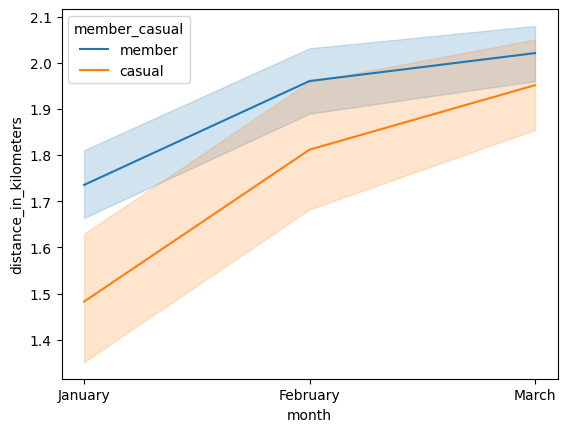

In [12]:
sns.lineplot(x=df['month'],y=df['distance_in_kilometers'],hue=df['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7df880e1a620>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

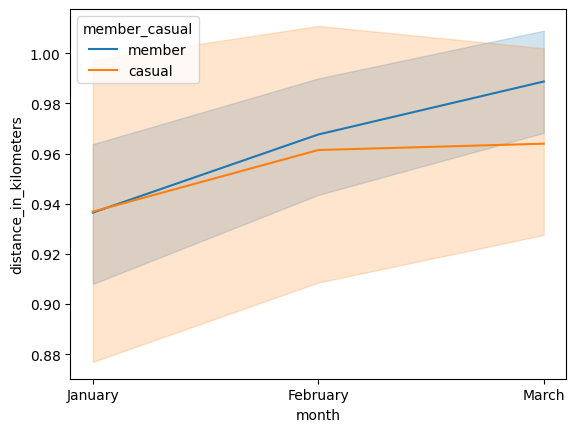

In [13]:
below_mean_distance = df[df['distance_in_kilometers']<= np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=below_mean_distance['month'],y=below_mean_distance['distance_in_kilometers'],hue=below_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7df880cb8b80>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

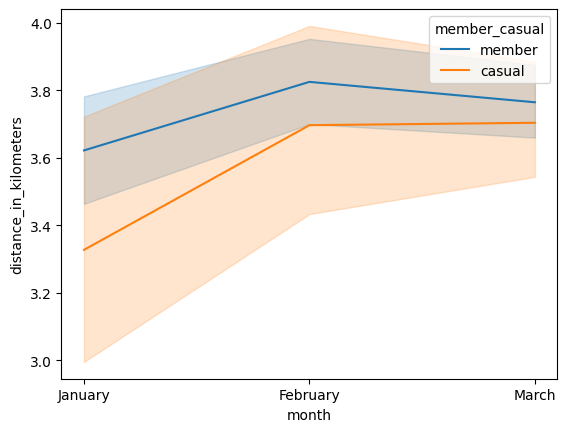

In [14]:
above_mean_distance = df[df['distance_in_kilometers']> np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=above_mean_distance['month'],y=above_mean_distance['distance_in_kilometers'],hue=above_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

In [15]:
ratioa = len(above_mean_distance[above_mean_distance['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean distance:',ratioa*100,'%')

The percentage of casual rider riding above mean distance: 32.49783923941227 %


In [16]:
ratiob = len(above_mean_distance[above_mean_distance['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean distance:',ratiob*100,'%')

The percentage of member rider riding above mean distance: 34.71246422066094 %


**Looking at the line plot and calculations it is easily spotted:**
* Casual and members does not have much difference when it comes to distance ride
* This could mean that the speed at which casual riders ride might be slower than member rider

<Axes: xlabel='count', ylabel='month'>

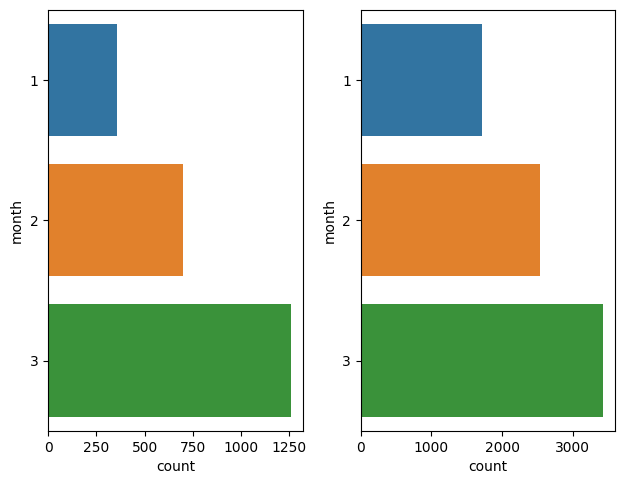

In [17]:
casual_df = df[df['member_casual']=='casual']
member_df = df[df['member_casual']=='member']
import matplotlib.pyplot as plt

# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['month'], ax=axes[0])
sns.countplot(y=member_df['month'], ax=axes[1])

<Axes: xlabel='count', ylabel='day_of_week'>

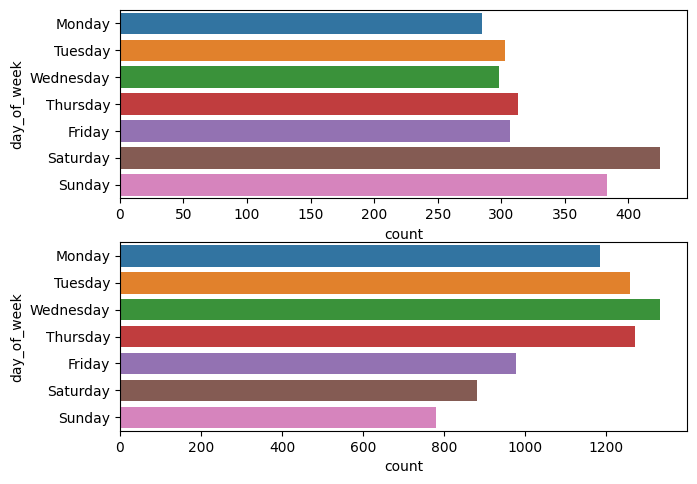

In [18]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[0])
sns.countplot(y=member_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1])

**From the above tables, we can conclude:**
* Casual riders like riding on the weekends
* Member riders seem to prefer the weekdays

<Axes: xlabel='rideable_type', ylabel='count'>

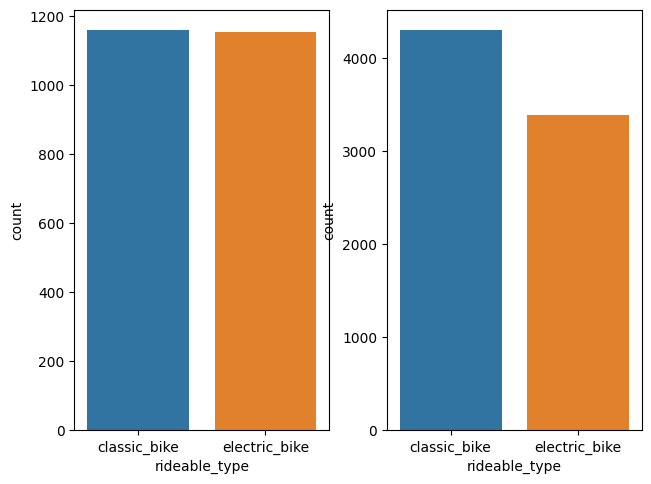

In [19]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(x=casual_df['rideable_type'], ax=axes[0])
sns.countplot(x=member_df['rideable_type'], ax=axes[1])

**It also seems like:**
* Casual riders used classic bikes and electric bikes equally
* Members riders prefered classic bikes

In [20]:
import plotly.express as px
import pandas as pd
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="start_lat", 
                        lon="start_lng", 
                        hover_name="ride_id", 
                        hover_data=["start_station_name", "start_station_id"],
                        color="member_casual",
                        color_continuous_scale=color_scale,
                        size="distance_in_kilometers",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [21]:
import plotly.express as px
import pandas as pd
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="end_lat", 
                        lon="end_lng", 
                        hover_name="ride_id", 
                        hover_data=["end_station_name", "end_station_id"],
                        color="member_casual",
                        color_continuous_scale=color_scale,
                        size="distance_in_kilometers",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**From the 2 geographical plot:**
* Starting point and ending point have the same distribution
* Most member riders seems to be from central Chicago
* A minority of casual riders seems to have a wider distribution on the outskirt of Chicago

# Cleaning the data
**Let's start by finding missing values**

In [22]:
df.isnull().sum()

ride_id                      0
rideable_type                0
started_at                   0
ended_at                     0
start_station_name        1329
start_station_id          1329
end_station_name          1356
end_station_id            1356
start_lat                    0
start_lng                    0
end_lat                      0
end_lng                      0
member_casual                0
month                        0
distance_in_kilometers       0
day_of_week                  0
ride_length                  0
dtype: int64

**Looking at the number of blank values:**
* As stated above, the null values might be a result of user or the system so imputation would not be probable
* I will proceed to drop them for a smooth model training

In [23]:
new_df = df.dropna()
new_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,distance_in_kilometers,day_of_week,ride_length
0,CFEF9FFE6CC94F58,classic_bike,2024-03-11 19:36:14+00:00,2024-03-11 19:49:20+00:00,Larrabee St & Webster Ave,13193,Dearborn Pkwy & Delaware Pl,TA1307000128,41.921822,-87.644140,41.898969,-87.629912,member,3,2.800644,Monday,0 days 00:13:06
1,7A82C43569F230AA,classic_bike,2024-02-08 17:30:24+00:00,2024-02-08 17:33:27+00:00,Halsted St & Maxwell St,TA1309000001,Clinton St & Roosevelt Rd,WL-008,41.864883,-87.647071,41.867118,-87.641088,member,2,0.554269,Thursday,0 days 00:03:03
2,FD25CFAEA932E414,electric_bike,2024-03-01 14:13:48+00:00,2024-03-01 14:16:58+00:00,Chicago Ave & Sheridan Rd,E008,Sheridan Rd & Noyes St (NU),604,42.050537,-87.677861,42.058239,-87.677432,member,3,0.857145,Friday,0 days 00:03:10
3,7C1DBAB126AA7287,electric_bike,2024-03-18 18:56:42+00:00,2024-03-18 19:10:50+00:00,Ashland Ave & Division St,13061,Ritchie Ct & Banks St,KA1504000134,41.903426,-87.667953,41.906866,-87.626217,member,3,3.475099,Monday,0 days 00:14:08
5,1BDB378EE02FFC3B,electric_bike,2024-01-25 12:20:03+00:00,2024-01-25 12:22:50+00:00,Sheridan Rd & Lawrence Ave,TA1309000041,Broadway & Wilson Ave,13074,41.969541,-87.654566,41.965221,-87.658139,member,1,0.563929,Thursday,0 days 00:02:47


In [24]:
new_df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name          0
end_station_id            0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
month                     0
distance_in_kilometers    0
day_of_week               0
ride_length               0
dtype: int64

**There are no more null to be found let's move on to outliers**

In [25]:
new_df.describe()

,start_lat,start_lng,end_lat,end_lng,month,distance_in_kilometers,ride_length
count,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927.000000,7927
mean,41.897321,-87.645125,41.898025,-87.645127,2.244985,1.884683,0 days 00:13:38.076321433
std,0.046080,0.025298,0.046440,0.025181,0.775625,1.740545,0 days 00:33:47.965870619
min,41.691182,-87.801052,41.691211,-87.807143,1.000000,0.000000,-1 days +23:59:59
25%,41.878166,-87.658971,41.879255,-87.658416,2.000000,0.807335,0 days 00:04:57
50%,41.893992,-87.642788,41.894345,-87.642884,2.000000,1.365354,0 days 00:08:21
75%,41.923931,-87.629521,41.925330,-87.629589,3.000000,2.373084,0 days 00:14:31
max,42.064854,-87.543115,42.064854,-87.548515,3.000000,15.971697,0 days 22:14:19


**Looking at the table:**
* The distance columns have a mean of 1.88 but the max value is 15,9 which is almost 15 times higher and it is unusual for someone to ride 15km
* Ride length wise the mean is 13 minutes but the min values is -1 days which is definitely wrong

<Axes: xlabel='ride_length'>

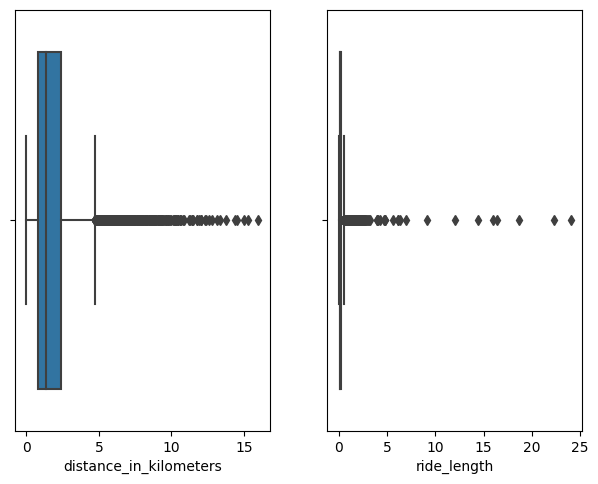

In [26]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=new_df['distance_in_kilometers'], hue=df['member_casual'], ax=axes[0])
sns.boxplot(x=new_df['ride_length'].dt.seconds/3600, hue=df['member_casual'], ax=axes[1])

**Looking at the 2 box plot:**
* We have a lot more outliers than expected
* It seems that most of them are collective outliers

<Axes: xlabel='distance_in_kilometers', ylabel='ride_length'>

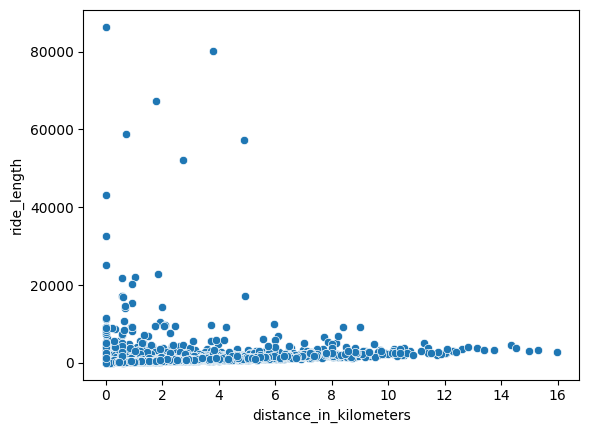

In [27]:
sns.scatterplot(x=new_df['distance_in_kilometers'],y=new_df['ride_length'].dt.seconds)

**From the graph above:**
* Distance and ride length have very slight correlation
* It is not realistic spending more than 10000 seconds to ride less than 10 km and only 1000 seconds to ride more than 10 km but this need further investigation and i dont have the data to investigate them as i can not take into consideration user mistake for not returning bike or what they do when they stop riding bikes to do another thing.

In [28]:
model_df = pd.get_dummies(new_df)
model_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,month,distance_in_kilometers,ride_length,ride_id_0005C5DB8461CEA8,...,end_station_id_chargingstx5,member_casual_casual,member_casual_member,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2024-03-11 19:36:14+00:00,2024-03-11 19:49:20+00:00,41.921822,-87.644140,41.898969,-87.629912,3,2.800644,0 days 00:13:06,False,...,False,False,True,False,True,False,False,False,False,False
1,2024-02-08 17:30:24+00:00,2024-02-08 17:33:27+00:00,41.864883,-87.647071,41.867118,-87.641088,2,0.554269,0 days 00:03:03,False,...,False,False,True,False,False,False,False,True,False,False
2,2024-03-01 14:13:48+00:00,2024-03-01 14:16:58+00:00,42.050537,-87.677861,42.058239,-87.677432,3,0.857145,0 days 00:03:10,False,...,False,False,True,True,False,False,False,False,False,False
3,2024-03-18 18:56:42+00:00,2024-03-18 19:10:50+00:00,41.903426,-87.667953,41.906866,-87.626217,3,3.475099,0 days 00:14:08,False,...,False,False,True,False,True,False,False,False,False,False
5,2024-01-25 12:20:03+00:00,2024-01-25 12:22:50+00:00,41.969541,-87.654566,41.965221,-87.658139,1,0.563929,0 days 00:02:47,False,...,False,False,True,False,False,False,False,True,False,False


**This is a dataframe i use for model training**

In [29]:
from sklearn import preprocessing 

final_df = new_df
label_encoder = preprocessing.LabelEncoder() 

final_df['member_casual']= label_encoder.fit_transform(new_df['member_casual']) 
final_df['day_of_week']= label_encoder.fit_transform(new_df['day_of_week']) 
final_df['rideable_type']= label_encoder.fit_transform(new_df['rideable_type']) 
final_df.head()

/tmp/ipykernel_226/3782406369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_226/3782406369.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_226/3782406369.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,distance_in_kilometers,day_of_week,ride_length
0,CFEF9FFE6CC94F58,0,2024-03-11 19:36:14+00:00,2024-03-11 19:49:20+00:00,Larrabee St & Webster Ave,13193,Dearborn Pkwy & Delaware Pl,TA1307000128,41.921822,-87.644140,41.898969,-87.629912,1,3,2.800644,1,0 days 00:13:06
1,7A82C43569F230AA,0,2024-02-08 17:30:24+00:00,2024-02-08 17:33:27+00:00,Halsted St & Maxwell St,TA1309000001,Clinton St & Roosevelt Rd,WL-008,41.864883,-87.647071,41.867118,-87.641088,1,2,0.554269,4,0 days 00:03:03
2,FD25CFAEA932E414,1,2024-03-01 14:13:48+00:00,2024-03-01 14:16:58+00:00,Chicago Ave & Sheridan Rd,E008,Sheridan Rd & Noyes St (NU),604,42.050537,-87.677861,42.058239,-87.677432,1,3,0.857145,0,0 days 00:03:10
3,7C1DBAB126AA7287,1,2024-03-18 18:56:42+00:00,2024-03-18 19:10:50+00:00,Ashland Ave & Division St,13061,Ritchie Ct & Banks St,KA1504000134,41.903426,-87.667953,41.906866,-87.626217,1,3,3.475099,1,0 days 00:14:08
5,1BDB378EE02FFC3B,1,2024-01-25 12:20:03+00:00,2024-01-25 12:22:50+00:00,Sheridan Rd & Lawrence Ave,TA1309000041,Broadway & Wilson Ave,13074,41.969541,-87.654566,41.965221,-87.658139,1,1,0.563929,4,0 days 00:02:47


In [39]:
h_df = final_df.loc[:,'start_lat':'ride_length']
h_df['ride_length'] = h_df['ride_length'].dt.seconds
h_df.head()

,start_lat,start_lng,end_lat,end_lng,member_casual,month,distance_in_kilometers,day_of_week,ride_length
0,41.921822,-87.644140,41.898969,-87.629912,1,3,2.800644,1,786
1,41.864883,-87.647071,41.867118,-87.641088,1,2,0.554269,4,183
2,42.050537,-87.677861,42.058239,-87.677432,1,3,0.857145,0,190
3,41.903426,-87.667953,41.906866,-87.626217,1,3,3.475099,1,848
5,41.969541,-87.654566,41.965221,-87.658139,1,1,0.563929,4,167


<Axes: >

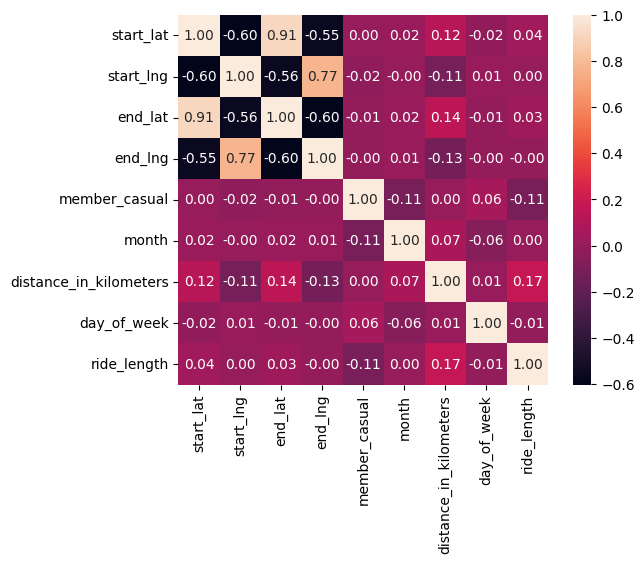

In [46]:
sns.heatmap(data=h_df.corr(),square=True,annot=True, fmt='.2f')

**It seems that there are no correlation whatsoever between these variables based on the numbers**